<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setting-up-the-enviornment" data-toc-modified-id="Setting-up-the-enviornment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up the enviornment</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Data-Cleanup" data-toc-modified-id="Data-Cleanup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleanup</a></span><ul class="toc-item"><li><span><a href="#Any-missing-values?" data-toc-modified-id="Any-missing-values?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Any missing values?</a></span></li><li><span><a href="#Changing-year-data-type" data-toc-modified-id="Changing-year-data-type-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Changing year data type</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-most-successful-game-across-all-platforms-in-terms-of-sales-since-1980?" data-toc-modified-id="Question-1:-What-is-the-most-successful-game-across-all-platforms-in-terms-of-sales-since-1980?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Question 1: What is the most successful game across all platforms in terms of sales since 1980?</a></span></li><li><span><a href="#Question-2:-Who-are-the-top-publishers-for-the-3-highest-selling-genre?" data-toc-modified-id="Question-2:-Who-are-the-top-publishers-for-the-3-highest-selling-genre?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Question 2: Who are the top publishers for the 3 highest selling genre?</a></span><ul class="toc-item"><li><span><a href="#What-are-the-3-highest-selling-genres?" data-toc-modified-id="What-are-the-3-highest-selling-genres?-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>What are the 3 highest selling genres?</a></span></li><li><span><a href="#Top-3-publishers-for-the-3-highest-selling-genre" data-toc-modified-id="Top-3-publishers-for-the-3-highest-selling-genre-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Top 3 publishers for the 3 highest selling genre</a></span></li></ul></li><li><span><a href="#Questions-3:-How-have-different-platforms-fared-across-the-years-in-terms-of-total-sales?" data-toc-modified-id="Questions-3:-How-have-different-platforms-fared-across-the-years-in-terms-of-total-sales?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Questions 3: How have different platforms fared across the years in terms of total sales?</a></span></li></ul></li></ul></div>

# Introduction

- We will be using the __Video Games sales__ dataset for this analysis. The data ranges from the year 1980 to 2020. The questions we would like to answer are:

    1. What is the most successful game across all platforms in terms of sales since 1980?
    2. Who are the top publishers for the 3 highest selling genre?
    3. How have different platforms fared across the years in terms of total sales?

# Setting up the enviornment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data

In [2]:
# Read the data from the csv
data = pd.read_csv('../Data/vgsales.csv')

In [3]:
# check the shape
data.shape

(16598, 11)

In [4]:
# Glimpse at the data
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


# Data Cleanup

## Any missing values?

In [5]:
# calc total missing values
total_series = data.isnull().sum().sort_values(ascending=False)

# calc percentages
perc_series = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)

# concatenating total values and percentages
missing_data = pd.concat([total_series, perc_series*100], axis=1, keys=['Total #', 'Percent'])

# Looking at top 20 entries
missing_data.head()

,Total #,Percent
Year,271,1.632727
Publisher,58,0.349440
Global_Sales,0,0.000000
Other_Sales,0,0.000000
JP_Sales,0,0.000000


- There are ~2% rows with missing values.
- These missing values are in the categorical features. 
- Although we can impute the missing values with most frequent or any other method, we will drop them for now. 

In [6]:
# Dropping NA rows
data_clean = data.dropna().reset_index(drop=True)

In [7]:
print('We ended up dropping {} rows from our data'.format(data.shape[0]-data_clean.shape[0]))

We ended up dropping 307 rows from our data


## Changing year data type

In [8]:
# Converting year from float to datetime
data_clean['Year'] = pd.to_datetime(data_clean['Year'], format='%Y')

In [9]:
# glance at the data
data_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Analysis

## Question 1: What is the most successful game across all platforms in terms of sales since 1980?
- Let's see what game sold the most copies since 1980 across all platforms

In [31]:
# Aggregating the data
game_df = data_clean.groupby(['Name'])['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)

In [66]:
def plot_bar(df,x,y,top_n=10):
    '''
    Description: This function plots the a bar chart for a given df
    
    Input:
    df: the base dataframe for this plot.
    x: feature on the x - axis
    y: feature on the y-axis
    top_n: number of features the user wants on the x axis
    
    Output:
    bar plot with the specified x and y axis
    '''
    chart = sns.catplot(data = df.head(top_n) ,
                        x = x,
                        y= y,
                        kind='bar',
                        height=4,
                        aspect=2,
                        palette='Set2')
    
    # adding title
    plt.title(y +' across '+ x)

    # Setting X labels
    chart.set_xticklabels(fontweight='light',
                          fontsize='large',
                          rotation=90,
                          horizontalalignment='center')
    
    plt.show()

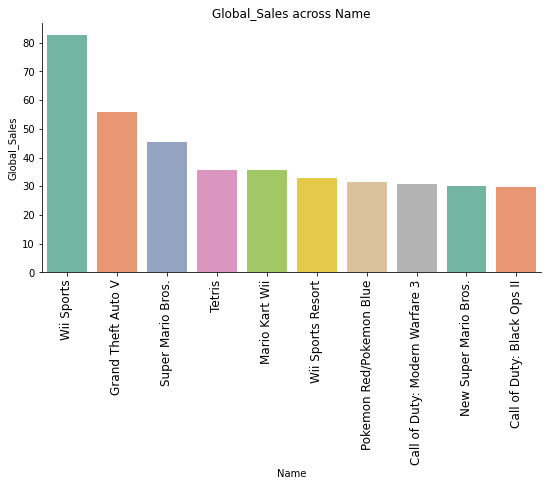

In [67]:
# plot the data
plot_bar(df=game_df,x='Name',y='Global_Sales')

- So, Wii Sports has been the most successful video game since 1980, selling more than 80mln copies globally.

## Question 2: Who are the top publishers for the 3 highest selling genre?

### What are the 3 highest selling genres?

<Figure size 864x360 with 0 Axes>

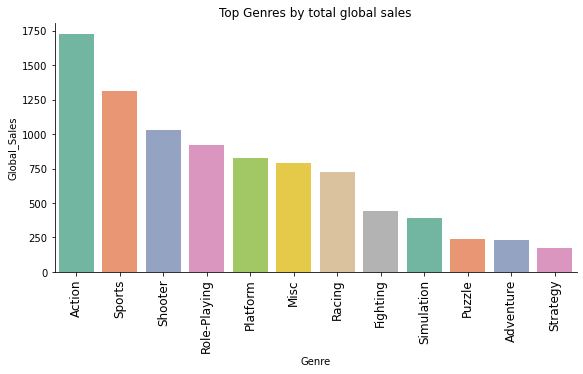

In [190]:
# aggregating data for top genres
top_3_genres = data_clean.groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)


## Plotting sales by genre
plt.figure(figsize=(12,5))
# plotting the bar plot
chart = sns.catplot(data = top_3_genres ,
                        x = 'Genre',
                        y= 'Global_Sales',
                        kind='bar',
                        height=4,
                        aspect=2,
                        palette='Set2')

# formating labels
chart.set_xticklabels(fontweight='light',
                          fontsize='large',
                          rotation=90,
                          horizontalalignment='center')
# set title  
plt.title('Top Genres by total global sales')
plt.show()

- So let's see who are the top publishers across these 3 genres?

### Top 3 publishers for the 3 highest selling genre

In [35]:
# Aggregating the data
pub_genre_df = data_clean.groupby(['Genre','Publisher'])['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)


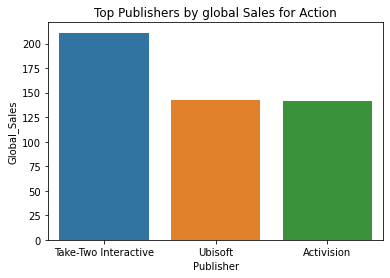

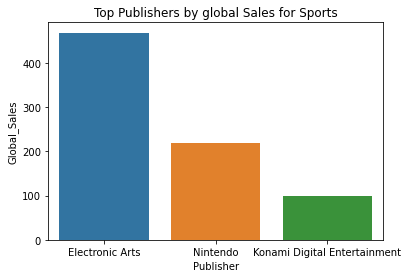

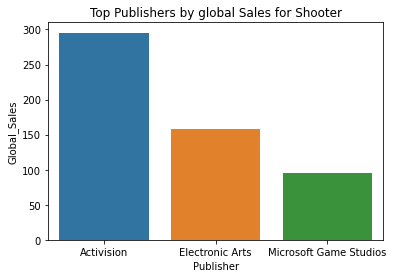

In [184]:
# Get a list of all the genres except Misc
genre_list = ['Action','Sports','Shooter']

# run a for loop
for genre in genre_list:
    df = pub_genre_df[pub_genre_df['Genre']==genre]
    chart = sns.barplot(data=df.head(3),
                        x = 'Publisher',
                        y = 'Global_Sales')
    
    plt.title('Top Publishers by global Sales for ' + genre)
    plt.show()

This is not surprising if you consider the inventory for these publishers.
- In Action, Take Two, who own the GTA franchise, are the leaders.
- In Sport, EA, who own the Fifa and Madden franchise, are the leaders.
- For Shooter, Activision, who own the Call of Duty franchise, are the leaders.

## Questions 3: How have different platforms fared across the years in terms of total sales?

In [110]:
# getting a list of top 10 platforms in terms of sales over the years 
top_platform = data_clean.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False).head(10)['Platform'].tolist()

# Creating a dataframe for the top platforms
platforms_across_years = data_clean[data_clean['Platform'].isin(top_platform)].groupby(['Platform','Year'])['Global_Sales'].sum().reset_index()


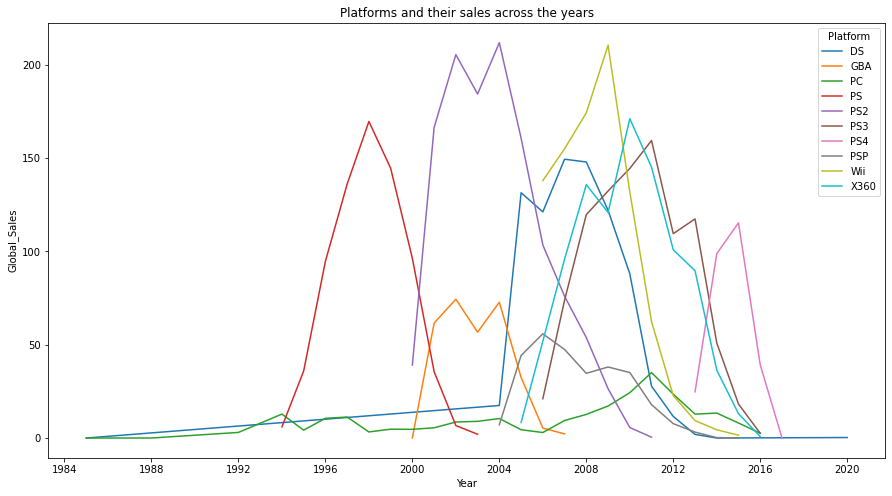

In [115]:
# plotting the linegraph
plt.figure(figsize = (15,8))
sns.lineplot(data = platforms_across_years,
            x = 'Year',
            y = 'Global_Sales',
            hue = 'Platform')
plt.title('Platforms and their sales across the years')
plt.show()

- Fans of different platforms will argue which was the best platform every. It terms on the numbers, it's difficult to pinpoint a single platform that was "the best".
    - Are you looking for longetivity? Well PC seems to have been there since the start and continues to this day!
    - Are you looking for Sales alone? PS2 seems to have captured the market big time. No other platform seems to have  outperformed PS2 in that regards, not even PS3, PS4.
    - As a company though, SONY and Nintnedo seem to be the top players. Sony owns PS, PS2, PS3, PS4, PSP. Whereas Nintendo owns DS, GBA, Wii. 